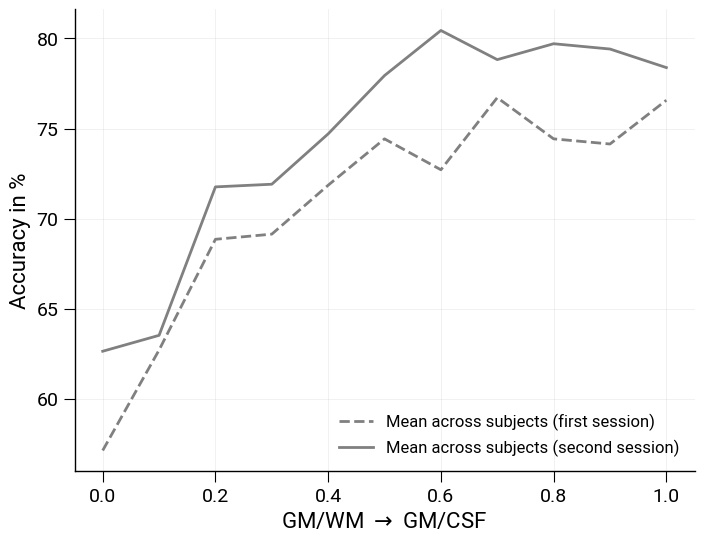

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

subjects = ["p1", "p2", "p3", "p4", "p5"]

DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/decoding"

def plot_data(input, part, color, linestyle, label):

    y_mean = []
    for subj in subjects:
        path = Path(DIR_DATA) / subj
        aha = path.glob(f"{input}*")
        files = []
        for i, f in enumerate(aha):
            if part == 0:
                if i == 0:
                    continue
            if part == 1:
                if i == 1:
                    continue
            if part == 2:
                pass
            file = f / "bandpass_none/accuracy.csv"
            files.append(file)

        for file in files:
            data = np.genfromtxt(file, delimiter=',')
            nlayer = np.shape(data)[0]

            y = np.zeros(nlayer)
            for j in range(nlayer):
                y[j] = np.mean(data[j, :] * 100)

            y_mean.append(y)

    y_mean = np.array(y_mean)
    y_mean = np.mean(y_mean, axis=0)
    y_sem = sem(y_mean, axis=0)

    if part == 2:
        plt.plot(np.linspace(0, 1, nlayer), y_mean, color=color, linestyle=linestyle, linewidth=2, label=label)
        #plt.errorbar(np.arange(nlayer), y_mean, y_sem, fmt='.-', color=color, alpha=alpha)
        plt.fill_between(np.linspace(0, 1, nlayer), y_mean-y_sem, y_mean+y_sem, facecolor=color, interpolate=True, alpha=0.24, label="Standard error across subjects (both sessions)")
        #plt.plot(np.arange(nlayer), y_mean-y_sem, linestyle="--", linewidth=2, color=color, alpha=alpha)
        #plt.plot(np.arange(nlayer), y_mean+y_sem, linestyle="--", linewidth=2, color=color, alpha=alpha)
    else:
        plt.plot(np.linspace(0, 1, nlayer), y_mean, color=color, linestyle=linestyle, label=label)

f = "S"
fig, ax = plt.subplots(figsize=(8,6))
if f == "V":
    color="#1990BE"
    file_out = "/data/pt_01880/decoding_vaso.svg"
elif f == "G":
    color="#A12A48"
    file_out = "/data/pt_01880/decoding_ge.svg"
elif f == "S":
    color="#57B154"
    file_out = "/data/pt_01880/decoding_se.svg"
plot_data(f, part=0, color="gray", linestyle="--", label="Mean across subjects (first session)")
plot_data(f, part=1, color="gray", linestyle="-", label="Mean across subjects (second session)")
plot_data(f, part=2, color=color, linestyle="-", label="Mean across subjects (both sessions)")
plt.xlabel(r"GM/WM $\rightarrow$ GM/CSF")
plt.ylabel("Accuracy in %")
plt.legend(loc="lower right")
fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")